<a href="https://colab.research.google.com/github/Yuyang-Yao/Math_-5750_Project3/blob/main/project3_Q2_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_iris, make_moons, load_breast_cancer, fetch_california_housing
from sklearn.datasets import get_data_home
# from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from scipy import io #will use this to load matlab data

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# your code here

# 3. Fashion-MNIST image classification  using pytorch

https://www.tensorflow.org/tutorials/images/cnn?hl=zh-cn

In [3]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 28, 28, 1)
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0
X_train = X_train[..., None]
X_test  = X_test[..., None]



y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
import tensorflow as tf
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# your code here

Using device: cuda


In [6]:
# loading max-pooing and concolution layer model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout

In [7]:
import time

In [ ]:
model_CNN1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    Conv2D(20,(3,3),activation='relu', padding='same'),# the 32 filters are independent; each applies a 3×3 kernel over the 28×28 image (every row and col), producing 32 feature maps
    # padding='same'), adds zero-paddings to preserve the 28×28 size, so did not ignore edge
    #Each 3×3 filter detects one type of feature (like horizontal edge, vertical edge, curve, texture, etc.).
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),
    Dense(100,activation='relu'),# use two fully conneced layer looks enough, need a bit more epotch to increase accuracy of training set. speed similar
    #Dense(60,activation='tanh'),#tanh, sigmoid
    Dense(10,activation='softmax')
])

model_CNN1.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])


tuning learning rate, or using weight regularization.

In [ ]:

start_t_CNN1 = time.time()
model_CNN1.fit(X_tr, y_tr, epochs=4)
end_t_CNN1 =time.time()
CNN_train_t1=end_t_CNN1-start_t_CNN1 #Yes — it runs 1563 mini-batches, each with 32 samples, completing one epoch; then repeats for several epochs to refine weights.



Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8031 - loss: 0.5513
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9057 - loss: 0.2637
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9215 - loss: 0.2114
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9320 - loss: 0.1816


In [ ]:
print('training time for adam:', CNN_train_t1)
# Evaluate the model on the validate data:
model_CNN1.evaluate(X_val,  y_val, verbose=2)

training time for adam: 23.454506397247314
313/313 - 2s - 7ms/step - accuracy: 0.9142 - loss: 0.2432


[0.24320712685585022, 0.9142000079154968]

Overfitiing!

In [ ]:
# from 0.908-0.916

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


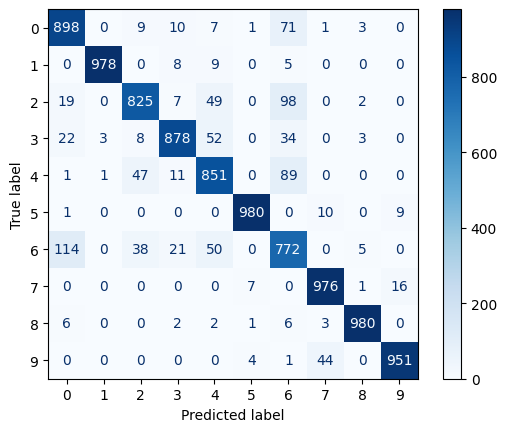

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict class labels
y_pred_CNN1_test1 = np.argmax(model_CNN1.predict(X_test), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_CNN1_test1 )

# Display
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')


more leayers

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_CNN1_test1))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.89      0.82      0.86      1000
           3       0.94      0.88      0.91      1000
           4       0.83      0.85      0.84      1000
           5       0.99      0.98      0.98      1000
           6       0.72      0.77      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



sigmoid activation for convolution layer and then use relu for linear fully connected layers later is not good, around 0.86 accuracy for test set

more leayers

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model_CNN2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    Conv2D(30,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001)),# the 32 filters are independent; each applies a 3×3 kernel over the 28×28 image (every row and col), producing 32 feature maps
     #padding='same' adds zero-paddings to preserve the 28×28 size, so did not ignore edge
    # regularizers.l2(0.001),# add regularization to prevent overfit

    BatchNormalization(),# stabalizing layer,or normalizing to make it more stable,especially for relu acitivation later,maybe increase spead
    Activation('relu'),
    Dropout(0.2),
    MaxPooling2D((2,2)),

    Conv2D(15,(3,3), padding='same',kernel_regularizer=regularizers.l2(0.001),),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),# x*=x*Ber (p), p=drop out rate,
    MaxPooling2D((2,2)),

    # now do "linear fully connected layer"
    Flatten(),
    Dense(120,activation='relu',kernel_regularizer=regularizers.l2(0.001),),# reduce dim more than 1st model since we do max pooling twice

    Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),


    Dense(10,activation='softmax')
])



In [ ]:
from tensorflow.keras.optimizers import Adam
model_CNN2.compile(optimizer=Adam(learning_rate=1e-4),# import adam, the learning rate does not belongs to the comile method, importantt, important
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
model_CNN2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    Conv2D(30,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001)),# the 32 filters are independent; each applies a 3×3 kernel over the 28×28 image (every row and col), producing 32 feature maps
     #padding='same' adds zero-paddings to preserve the 28×28 size, so did not ignore edge
    # regularizers.l2(0.001),# add regularization to prevent overfit

    BatchNormalization(),# stabalizing layer,or normalizing to make it more stable,especially for relu acitivation later,maybe increase spead
    Activation('relu'),
    Dropout(0.2),
    MaxPooling2D((2,2)),

    Conv2D(15,(3,3), padding='same',kernel_regularizer=regularizers.l2(0.001),),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),# x*=x*Ber (p), p=drop out rate,
    MaxPooling2D((2,2)),

    # now do "linear fully connected layer"
    Flatten(),
    Dense(120,activation='relu',kernel_regularizer=regularizers.l2(0.001),),# reduce dim more than 1st model since we do max pooling twice

    Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),


    Dense(10,activation='softmax')
    ])

In [ ]:
from tensorflow.keras.optimizers import Adam
model_CNN2.compile(optimizer=Adam(learning_rate=1e-4),# import adam, the learning rate does not belongs to the comile method, importantt, important
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
start_t_CNN2 = time.time()
model_CNN2.fit(X_tr, y_tr, epochs=25)
end_t_CNN2 =time.time()
CNN_train_t2=end_t_CNN2-start_t_CNN2

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6894 - loss: 1.2300
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8500 - loss: 0.6743
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8722 - loss: 0.5895
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8830 - loss: 0.5384
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8898 - loss: 0.5079
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8949 - loss: 0.4838
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8997 - loss: 0.4562
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9045 - loss: 0.4340
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9039 - loss: 0.4236
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9080 - loss: 0.4112
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9114 - loss: 0.3925
Epoch 12/25
1563/1563 ━━━━━━━

looks like  21 eporch is enough

In [ ]:
model_CNN2.evaluate(X_val,  y_val, verbose=2)

313/313 - 3s - 8ms/step - accuracy: 0.9103 - loss: 0.3424


[0.3424135148525238, 0.9103000164031982]

In [ ]:
print(CNN_train_t2)

107.28035044670105


reducing layer, reducing regularization

In [ ]:
model_CNN3 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    Conv2D(30,(3,3),padding='same'),

    BatchNormalization(),# stabalizing layer,or normalizing to make it more stable,especially for relu acitivation later,maybe increase spead
    Activation('relu'),
    Dropout(0.1),
    MaxPooling2D((2,2)),

    Conv2D(15,(3,3), padding='same'),# reducing number of filters (or kernels).
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.07),
    MaxPooling2D((2,2)),

    # now do "linear fully connected layer"
    Flatten(),
    Dense(120,activation='relu',kernel_regularizer=regularizers.l2(0.001)),# reduce dim more than 1st model since we do max pooling twice

    Dense(55,activation='relu',kernel_regularizer=regularizers.l2(0.001)),


    Dense(10,activation='softmax')
    ])

In [ ]:
model_CNN3.compile(optimizer=Adam(learning_rate=1e-4),# import adam, the learning rate does not belongs to the comile method, importantt, important
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

Q: why each eporch later lik 7/8, accuracy will drop as you run more data like from 0.902 to 0.91 then to 0.905 30 words

That’s normal small fluctuation — mini-batch training updates weights stochastically, so accuracy oscillates.
Also, learning-rate decay or over-regularization can cause slower improvement or slight drops after convergence.

In [ ]:
start_t_CNN3 = time.time()
model_CNN3.fit(X_tr, y_tr, epochs=18)
end_t_CNN3 =time.time()
CNN_train_t3=end_t_CNN3-start_t_CNN3

Epoch 1/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9321 - loss: 0.2972
Epoch 2/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9304 - loss: 0.2977
Epoch 3/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9360 - loss: 0.2816
Epoch 4/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9337 - loss: 0.2829
Epoch 5/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9335 - loss: 0.2794
Epoch 6/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9356 - loss: 0.2742
Epoch 7/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9361 - loss: 0.2650
Epoch 8/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9393 - loss: 0.2574
Epoch 9/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9379 - loss: 0.2572
Epoch 10/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9406 - loss: 0.2494
Epoch 11/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9414 - loss: 0.2449
Epoch 12/18
1563/1563 ━━━━━━━━

already reach ralatively stable train around 92% for 11-15 eporch. But test just aroudn 0.90, validate 0.91. More generalized than previous model1. Maybe I should not use two conv+max pooling (or maybe should run more eporch, but wasting time). go back for one.

In [ ]:
model_CNN3.evaluate(X_val,  y_val, verbose=2)

313/313 - 2s - 7ms/step - accuracy: 0.9154 - loss: 0.3050


[0.30504992604255676, 0.9154000282287598]

In [ ]:
print('fine-tuned CNN (two conv and max pooling) trining time is:',CNN_train_t3)

fine-tuned CNN (two conv and max pooling) trining time is: 69.10926818847656


In [ ]:
model_CNN3.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9156 - loss: 0.3122


[0.31223174929618835, 0.9156000018119812]

In [ ]:
from sklearn.metrics import classification_report
y_pred_CNN1_test3=np.argmax(model_CNN3.predict(X_test), axis=1)

print(classification_report(y_test, y_pred_CNN1_test3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.89      0.87      1000
           3       0.91      0.91      0.91      1000
           4       0.83      0.91      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.73      0.76      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Finaly boost up to around 91.5%, the 2 conv2D can reach 0.915 for test set and valida, with loss 0.19, tiny a bit better thn 1 con2D above with similar loss (the 2d loss is a bit higher, but train accuracy already 95% (looks li?ke a bit overfit)). Tiny a bit more stable

In [ ]:
model_CNN4 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    Conv2D(32,(3,3),padding='same'),

    BatchNormalization(),# stabalizing layer,or normalizing to make it more stable,especially for relu acitivation later,maybe increase spead
    Activation('relu'),
    Dropout(0.1),
    MaxPooling2D((2,2)),

    # now do "linear fully connected layer"
    Flatten(),
    Dense(180,activation='relu',kernel_regularizer=regularizers.l2(0.0015)),# reduce dim more than 1st model since we do max pooling twice

    Dense(60,activation='relu',kernel_regularizer=regularizers.l2(0.0015)),


    Dense(10,activation='softmax')
    ])

In [ ]:
model_CNN4.compile(optimizer=Adam(learning_rate=1e-4),# import adam, the learning rate does not belongs to the comile method, importantt, important
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
start_t_CNN4 = time.time()
model_CNN4.fit(X_tr, y_tr, epochs=8)
end_t_CNN4 =time.time()

Epoch 1/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7991 - loss: 1.1550
Epoch 2/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8896 - loss: 0.7046
Epoch 3/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9052 - loss: 0.5706
Epoch 4/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9162 - loss: 0.4857
Epoch 5/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9229 - loss: 0.4263
Epoch 6/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9272 - loss: 0.3858
Epoch 7/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9307 - loss: 0.3575
Epoch 8/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9359 - loss: 0.3338


8 eporch for 1 conv2d+ ax pooling needed only, arrund train 0.935

In [ ]:
model_CNN4.evaluate(X_val,  y_val, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9129 - loss: 0.3895


[0.3895469605922699, 0.9128999710083008]

In [ ]:
CNN_train_t4=end_t_CNN4-start_t_CNN4
print('fine-tuned CNN (one conv and max pooling) trining time is:',CNN_train_t4)

fine-tuned CNN (one conv and max pooling) trining time is: 34.219961166381836


In [ ]:
model_CNN4.evaluate(X_test , y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9109 - loss: 0.4002


[0.40024083852767944, 0.9108999967575073]

In [ ]:
y_pred_CNN1_test4=np.argmax(model_CNN4.predict(X_test), axis=1)

print(classification_report(y_test, y_pred_CNN1_test4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.85      0.86      1000
           3       0.90      0.91      0.91      1000
           4       0.83      0.89      0.86      1000
           5       0.98      0.97      0.98      1000
           6       0.75      0.75      0.75      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



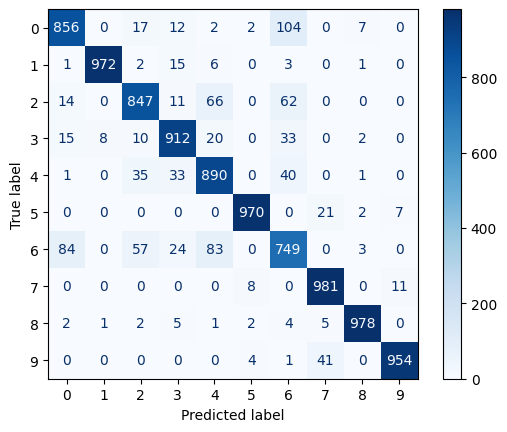

In [ ]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_4 = confusion_matrix(y_test, y_pred_CNN1_test4 )

# Display
ConfusionMatrixDisplay(confusion_matrix=cm_4).plot(cmap='Blues')

Lookslike accuracy is simialr for above tuning, compared to model 1. But, the corresponding loss function is better.

0 and 6 are commonly not predicting well. class 0 mistakenly as 6

In [ ]:
print(cm_4)

[[837   0  23  15   4   2 107   0  12   0]
 [  2 963   1  27   2   1   2   0   2   0]
 [ 11   0 908  14  20   0  45   0   2   0]
 [ 13   0  10 941  17   0  15   0   4   0]
 [  2   1 125  34 788   0  50   0   0   0]
 [  0   0   0   1   0 956   0  37   2   4]
 [ 86   0  87  35  43   0 735   0  14   0]
 [  0   0   0   0   0   4   0 974   0  22]
 [  3   0   1   7   0   2   2   4 981   0]
 [  0   0   0   0   0  10   0  38   1 951]]


# do SGD

1st just MLP with SGD

In [43]:

from tensorflow.keras import layers, models, optimizers

In [44]:
from tensorflow.keras.datasets import fashion_mnist# Q1 data

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train1, y_train1), (X_test1, y_test1) = fashion_mnist.load_data()
X_train1 = X_train.reshape(len(X_train1), -1)
X_test1  = X_test.reshape(len(X_test1), -1)

# Scale features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [53]:
MLP1_SGD = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [54]:
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(# polynimial inverse scaling decay in lecture?
    initial_learning_rate=0.01,
    decay_steps=1000,
    end_learning_rate=0.0001,
    power=0.5     # like inverse scaling with p=1/2
)
optimizer_SGD = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)



In [55]:
MLP1_SGD.compile(optimizer=optimizer_SGD,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [56]:
start_t_MLP1_SGD= time.time()
MLP1_SGD.fit(X_train1, y_train1, epochs=6)
end_t_MLP1_SGD =time.time()

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7992 - loss: 0.5560
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8836 - loss: 0.3214
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8843 - loss: 0.3217
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8861 - loss: 0.3139
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8887 - loss: 0.3081
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8858 - loss: 0.3134


In [57]:
y_pred_MLP1_SGD=np.argmax(MLP1_SGD.predict(X_test1), axis=1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [59]:
print(classification_report(y_test1, y_pred_MLP1_SGD))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.78      0.78      1000
           3       0.87      0.88      0.88      1000
           4       0.77      0.80      0.79      1000
           5       0.95      0.94      0.94      1000
           6       0.69      0.65      0.66      1000
           7       0.93      0.93      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



without too much tuning, SGD perfroms similarly to sk learn output, but a lot more faster on GPU and loss is also simialre to sk-learn

# CNN with SGD

In [41]:
from tensorflow.keras import regularizers


In [147]:
model_CNN_SGD1 = tf.keras.models.Sequential([ # same as above
    tf.keras.Input(shape=(28,28,1)),
    Conv2D(32,(3,3),padding='same'),

    BatchNormalization(),# stabalizing layer,or normalizing to make it more stable,especially for relu acitivation later,maybe increase spead
    Activation('relu'),
    Dropout(0.1),
    MaxPooling2D((2,2)),

    # now do "linear fully connected layer"
    Flatten(),
    Dense(180,activation='relu',kernel_regularizer=regularizers.l2(0.0015)),# reduce dim more than 1st model since we do max pooling twice

    Dense(60,activation='relu',kernel_regularizer=regularizers.l2(0.0015)),


    Dense(10,activation='softmax')
    ])

In [161]:
lr_schedule2 = tf.keras.optimizers.schedules.PolynomialDecay( #same as above but tensor flow want me to get a new one
    initial_learning_rate=.006,
    decay_steps=1000,
    end_learning_rate=0.0001,
    power=0.25# using same in sk learn tunded
)

optimizer_SGD2 = tf.keras.optimizers.SGD(learning_rate=lr_schedule2, momentum=0.75) # same in sk learn



In [162]:
model_CNN_SGD1.compile(optimizer=optimizer_SGD2,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [77]:

tf.config.run_functions_eagerly(False)


In [163]:
start_t_model_CNN_SGD1 = time.time()
model_CNN_SGD1.fit(X_tr, y_tr, epochs=6)
end_t_model_CNN_SGD1 =time.time()

Epoch 1/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9113 - loss: 0.6427
Epoch 2/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9329 - loss: 0.5656
Epoch 3/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9343 - loss: 0.5606
Epoch 4/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9344 - loss: 0.5609
Epoch 5/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9362 - loss: 0.5552
Epoch 6/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9340 - loss: 0.5571


initial-pretrained evlatuation CNN by SGD

In [151]:
model_CNN_SGD1.evaluate(X_val,  y_val, verbose=2)

313/313 - 2s - 8ms/step - accuracy: 0.8925 - loss: 0.8416


[0.8416258096694946, 0.8924999833106995]

In [152]:
y_pred_CNN_SGD1_test1=np.argmax(model_CNN_SGD1.predict(X_test), axis=1)

print(classification_report(y_test, y_pred_CNN_SGD1_test1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.88      0.90      0.89      1000
           4       0.80      0.83      0.82      1000
           5       0.97      0.96      0.97      1000
           6       0.72      0.65      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Now do another versoin of fine-tuning (you don’t retrain the entire model from scratch; you recompile or adjust the optimizer (e.g., learning rate, momentum) and continue training for refinement.). Lowering momentum from inital 0.85-0.8, and run my model againl,and see if accuracy on valadate and test increase (in momentem method, well here combined with SGD, each ietraion move a bit more tan GD. And now lower momentem, like move extra step samller...)

In [156]:
model_CNN_SGD1.evaluate(X_val,  y_val, verbose=2)

313/313 - 2s - 8ms/step - accuracy: 0.9017 - loss: 0.7386


[0.738598644733429, 0.9017000198364258]

In [157]:
y_pred_CNN_SGD1_test1=np.argmax(model_CNN_SGD1.predict(X_test), axis=1)

print(classification_report(y_test, y_pred_CNN_SGD1_test1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.83      0.84      1000
           3       0.88      0.92      0.90      1000
           4       0.83      0.84      0.84      1000
           5       0.97      0.97      0.97      1000
           6       0.72      0.71      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Yes, increase accuracy,good!!!!!!!!!!!!!!!!!!!!!!!

**In Keras, continuing training (k_th) just resumes from the last saved weights (last eporch of $(k-1)_{th}$), so the second run starts where the first ended — true fine-tuning, not pretraining.**


fine-tuning, not transfer learning, since you refine the same model’s weights instead of adapting a pretrained external network.

In [164]:
model_CNN_SGD1.evaluate(X_val,  y_val, verbose=2)

313/313 - 2s - 8ms/step - accuracy: 0.9104 - loss: 0.6165


[0.616467297077179, 0.9103999733924866]

In [165]:
y_pred_CNN_SGD1_test1=np.argmax(model_CNN_SGD1.predict(X_test), axis=1)

print(classification_report(y_test, y_pred_CNN_SGD1_test1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.85      0.86      1000
           3       0.89      0.93      0.91      1000
           4       0.86      0.85      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.74      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



**I only show the history of fine tuning on test not train, so the train history above is the last run**. Successfully increase accuracy of test set to 0.91 (I did not tune parameters for SGD just train based on pre-trains)

# transfer learning

VGG16, ResNet50,MobileNetV2 are available in tf.keras.applications

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import vgg16

In [ ]:
vgg_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3),weights='imagenet',include_top=False)
vgg_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

too big pramater set

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
MobileNetV2_model = MobileNetV2(input_shape=(224, 224, 3),# origianl: shape=(224, 224, 3)
                             include_top=False, # Exclude the classification head
                             weights='imagenet')
#base_model = tf.keras.applications.Xception(weights=None, input_shape=(28,28,3), include_top=False)
#base_model .summary()




In [ ]:
#MobileNetV2_model .summary()

0

only get params until block 3 through above history to reduce parameters

In [ ]:
from tensorflow.keras import layers, models


In [ ]:

#inputs = tf.keras.Input(shape=(224, 224, 3))# should map 28*28 to that trget one, since they have nice pre-trained params
#x = base_model_truncated(inputs, training=False) # Ensure the base model runs in inference mode
#x = layers.GlobalAveragePooling2D()(x) # reduce dim to keep key features since our model is smaller data set
#x = layers.Dense(64, activation='relu')(x)
#outputs = layers.Dense(10, activation='softmax')(x) # num_classes is your target class count
#model = models.Model(inputs, outputs)

In [ ]:
import gc
tf.keras.backend.clear_session()
gc.collect()

0

In [ ]:
#X_tr_resized = tf.image.resize(X_tr, [224,224])
#X_val_resized = tf.image.resize(X_val, [224,224])


above let my laptop CPU crash, so change to cv2 to resize and then convert to tensorflow version

In [ ]:
print(X_tr[0].shape)
print(X_tr.shape)


(28, 28, 1)
(50000, 28, 28, 1)


In [ ]:
X_tr_subset= X_tr[:10000]


In [ ]:
X_tr_subset_rgb=tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_tr_subset))  #convert to rgb data first to match the target

In [ ]:
X_tr_resized_subset_rb = tf.image.resize(X_tr_subset_rgb, [224,224])

In [ ]:
X_val_subset= X_val[:10000]

In [ ]:
X_val_subset_rgb=tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_val_subset))

In [ ]:
X_val_resized_subset_rgb =tf.image.resize(X_val_subset_rgb, [224,224])

In [ ]:
#import cv2, numpy as np
#X_tr_2 = np.array([cv2.resize(img, (224,224)) for img in X_tr])


In [ ]:
y_tr_subset=y_tr[:10000]
y_val_subset=y_val[:10000]

In [ ]:
#X_tr_resized_subset_rb = tf.cast(X_tr_resized_subset_rb, tf.float32)
#y_tr_subset = tf.cast(y_tr_subset, tf.int64)



In [ ]:
#X_val_resized_subset_rgb=tf.cast(X_val_resized_subset_rgb, tf.float32)
#y_val_subset = tf.cast(y_val_subset, tf.int64)

In [ ]:
#X_tr_resized_subset_rb = np.array(X_tr_resized_subset_rb, dtype="float32")
#y_tr_subset = np.array(y_tr_subset, dtype="int64")


In [ ]:
#X_val_resized_subset_rgb = np.array(X_val_resized_subset_rgb, dtype="float32")

In [ ]:
#y_valsubset = np.array(y_val_subset, dtype="int64")

In [ ]:
print(len(X_val_subset_rgb), len(y_val_subset))


10000 10000


In [ ]:
print(X_tr_resized_subset_rb.shape)
print(X_val_resized_subset_rgb.shape)


(10000, 224, 224, 3)
(10000, 224, 224, 3)


In [ ]:
#base_model_truncated=tf.keras.Model(inputs=MobileNetV2_model.input, outputs=MobileNetV2_model.get_layer('block_3_expand').output)
import tensorflow as tf, gc
tf.keras.backend.clear_session()
gc.collect()

base_model_truncated = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
base_model_truncated = tf.keras.Model(
    inputs=base_model_truncated.input,
    outputs=base_model_truncated.get_layer('block_4_expand').output
)


inputs2 = tf.keras.Input((224,224,3))
x = base_model_truncated(inputs2,training=True)   # freezes BatchNorm/Dropout layers, stabilizing inference;
#x = layers.Conv2D(64,3,padding='same',activation='relu')(x)
#x = layers.MaxPooling2D()(x)
x = layers.GlobalAveragePooling2D()(x)             # → 2D
x = layers.Dense(64,activation='relu')(x)
outputs2 = layers.Dense(10,activation='softmax')(x)
model = tf.keras.Model(inputs2, outputs2)

In [ ]:
base_model_truncated.count_params()

33792

In [ ]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # or 'categorical_crossentropy'
                  metrics=['accuracy'])

In [ ]:
model.fit(
    X_tr_resized_subset_rb, y_tr_subset,
    validation_data=(X_val_resized_subset_rgb, y_val_subset),
    epochs=5
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.5507 - loss: 1.2201 - val_accuracy: 0.1553 - val_loss: 9.8815
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.7833 - loss: 0.6039 - val_accuracy: 0.1623 - val_loss: 8.2690
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8109 - loss: 0.5268 - val_accuracy: 0.2344 - val_loss: 8.5651
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.8347 - loss: 0.4640 - val_accuracy: 0.2317 - val_loss: 7.7102
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.8404 - loss: 0.4466 - val_accuracy: 0.1318 - val_loss: 8.1817


In [ ]:
print(model.input_shape)         # should show (None,224,224,3)
print(type(model))


(None, 224, 224, 3)
<class 'keras.src.models.functional.Functional'>


In [ ]:
X_test_rgb=tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test))

In [ ]:
X_test_rgb_resized=tf.image.resize(X_test_rgb, [224,224])

In [ ]:
y_pred_transfer1 = np.argmax(model.predict(X_test_rgb_resized), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_transfer1 ))

              precision    recall  f1-score   support

           0       0.14      0.00      0.00      1000
           1       0.11      1.00      0.19      1000
           2       0.00      0.00      0.00      1000
           3       0.50      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.52      0.29      0.38      1000

    accuracy                           0.13     10000
   macro avg       0.13      0.13      0.06     10000
weighted avg       0.13      0.13      0.06     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Looks like 10k subset-data and the direct mapping from 28*28-(224*224,3) is not good. Edges or texture maybe torched. And the validate is worse